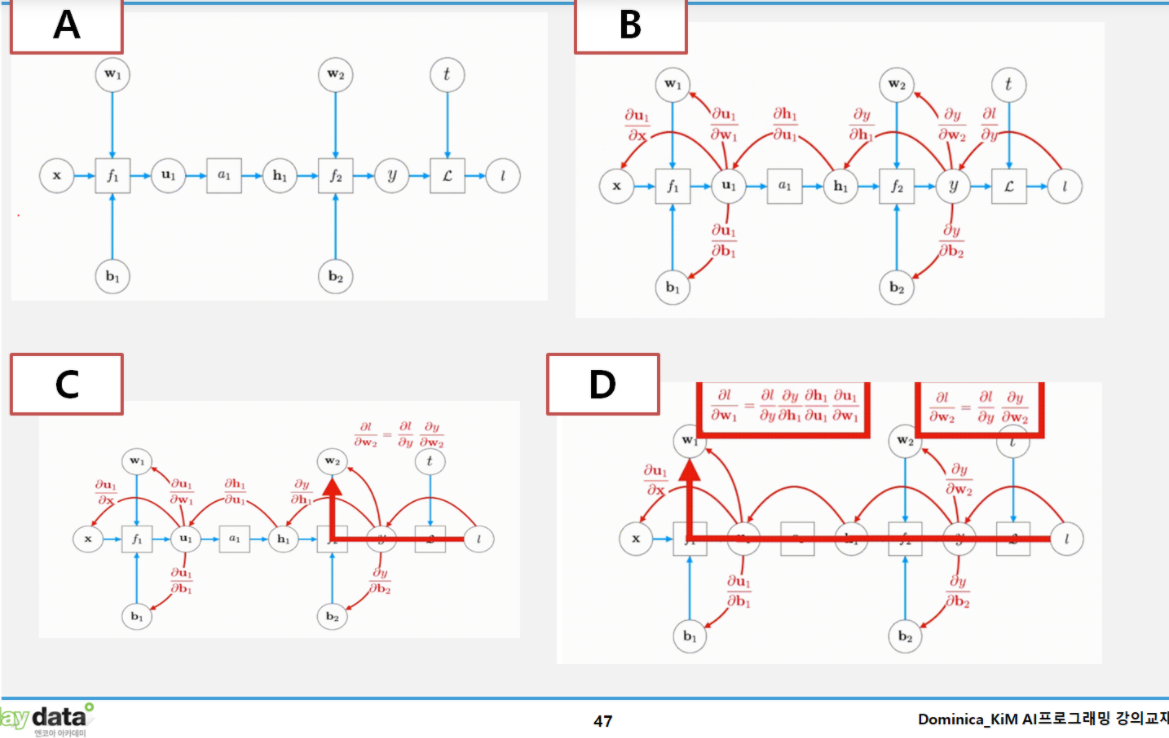

In [ ]:
# A 그림(순방향)
목적함수 : l = L(y,t)
동그라미는 변수, 사각형은 함수

전체를 신경망으로 본다면(합성함수) f로 나타낸다. f1, f2층이 있다.
f1과 f2 중간계층에서 비선형 변환을 a1으로 나타낸다.
입력값 x가 신경망 f1, f2 계층을 거쳐서 출력 l로 가는 것을 볼 수 있다. => 순방향

# B 그림(역방향) - 오차역전파법(error back propagation)
목적함수 l은 출력값이 작고 같은 각 매개변수를 찾아서 매개변수의 업데이트된 양을 구하려고 한다.
함수의 기울기만으로 계산되면서 가야한다. 함수의 모든 기울기를 곱한다.

빨간색으로 출력측에서 입력측으로 가면서 순전파하고는 다르게 역으로 가면서 함수 입력에 대한
기울기를 곱해 나가면서 매개변수에 대한 목적함수의 기울기가 계산된다.

미분의 연쇄 규칙의 구조를 이용해서 신경망을 구하는 함수
신경망을 구하는 함수의 구조는 매개변수에 대한 목적함수의 기울기를 차례로 전파하면서
지나간 경로를 반대방향으로 진행되게 한다.
진행중 함수의 기울기 곱셈에 의해 요구되는 알고리즘을 오차역전파 방법이라고 한다.

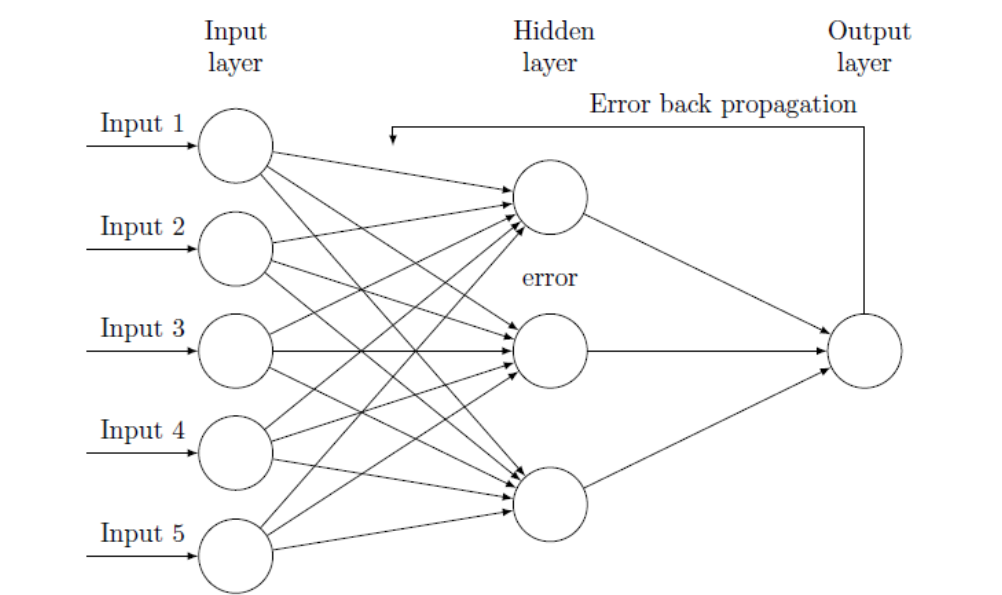

역전파 : 결과값을 통해서 다시 역으로 input 방향으로 오차를 다시 보내면서 가중치를 업데이트 하는 것
 - input이 들어오는 방향(순방향)으로 outlayer에서 결과값이 나오는 것을 확인할 수 있다.
<br> 

- 결과값은 오차(error)를 가지게 되는데 역전파는 이 오차를 다시 역방향인 hidden layer로 오차를 다시 보내면서 가중치를 계산하고 output에서 발생했던 오차를 적용시킨다
<br> 

- error = Output(i) * (1-Output(i)) * (Target(i) - Output(i))
<br> 
 - 한 번 돌리게 되면 1 epoch 이다. 라고 하면 epoch을 늘릴수록 가중치가 계속 업데이트(학습) 되면서 가중치의 최적값을 찾고, 오차가 점점 줄어든다.

In [ ]:
Affine / Softmax = Affine(순전파)
Affine(순전파) : 순전파에서 수행하는 행렬의 내적을 기하학으로 부르는 말이다.
    input값과 weight(가중치) 값들을 행렬 곱으로 계산하고 편향(Bias)를 추가해서 출력값 Y를 리턴한다.

In [ ]:
import numpy as np

def cross_entropy_error(y, t):
    delta = 1e-7  # 아주 작은 값 (y가 0인 경우 -inf 값을 예방)
    # print(t*np.log(y+delta))
    return -np.sum(t * np.log(y + delta)) / y.shape[0]

def softmax(a):
    c = np.max(a)  # 추가한 부분
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
        
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        return dx, self.dW, self.db
    
class Relu:
    def __init__(self):
        self.mask = None
        
    def forward(self, x):
        self.mask = (x <= 0)  # x 값이 0 이하면 True 크면  False; True, False 를 가지는 numpy 배열
        out = x.copy()
        out[self.mask] = 0  # mask 가 Ture 인 곳은 x 의 원소 값이 0, False 인 곳은 그대로 출력
        return out
    
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        return dx
    
class SoftmaxWithloss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        return dx
    
x = np.array([[1, 2]])
w1 = np.array([[1, 3, 5], [2, 4, 6]])
w2 = np.array([[1, 4], [2, 5], [3, 6]])
b1 = np.array([1, 2, 3])
b2 = np.array([1, 2])

# 순전파
affine1 = Affine(w1, b1)
affine2 = Affine(w2, b2)
relu1 = Relu()
relu2 = Relu()

# 은닉 1층
out1 = affine1.forward(x)
relu_out1 = relu1.forward(out1)

# 은닉 2층
out2 = affine2.forward(relu_out1)
relu_out2 = relu2.forward(out2)
print('out : \n', relu_out2)

# softmax
t = np.array([[0, 1]])
softmaxWithloss = SoftmaxWithloss()
loss = softmaxWithloss.forward(relu_out2, t)

# 역전파
dout = softmaxWithloss.backward()
# dout = relu_out2
print('dout : \n', dout)

# 은닉 2층
# relu 통과
relu_dout = relu2.backward(dout)
print('relu_dout : \n', relu_dout)

# affine 통과
dout1, dw2, db2 = affine2.backward(relu_dout)
print('dout1 : \n', dout1)
# print('dw2 : \n' ,dw2)
# print('db2 : \n' ,db2)

# 은닉 1층
relu_dout1 = relu1.backward(dout1)
print('relu_dout1 : \n', relu_dout1)
dx, dw1, db1 = affine1.backward(relu_dout1)
print('dx : \n', dx)
# print('dw1 : \n' ,dw1)
# print('db1 : \n' ,db1)

In [ ]:
import numpy as np

class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.original_x_shape = None
        # 가중치와 편향 매개변수의 미분
        self.dW = None
        self.db = None
        
    def forward(self, x):
        # 텐서 대응
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x
        out = np.dot(self.x, self.W) + self.b
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        dx = dx.reshape(*self.original_x_shape)  # 입력 데이터 모양 변경(텐서 대응)
        return dx
    
x = np.array([[1, 2], [3, 4]])
W = np.array([[1, 3, 5], [2, 4, 6]])
b = np.array([[1, 1, 1]])

ly = Affine(W, b)
out = ly.forward(x)

print(out)

In [3]:
import h5py

filename = 'C:\\Users\\user\\MyPython\\DL\\weight.hdf5'

def read_hdf5(path):
    weights = {}
    keys = []
    
    with h5py.File(path, 'r') as f:   # open file
        f.visit(keys.append)   # append all keys to list
        for key in keys:
            if ':' in key:   # contains data if ':' in key
                print(f[key].name)
                weights[f[key].name] = f[key].value
    return weights

read_hdf5(filename)

/conv2d_5/conv2d_5/bias:0
/conv2d_5/conv2d_5/kernel:0
/conv2d_6/conv2d_6/bias:0
/conv2d_6/conv2d_6/kernel:0
/dense_1/dense_1/bias:0
/dense_1/dense_1/kernel:0


<ipython-input-3-e6f099c32c8b>:14: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  weights[f[key].name] = f[key].value


{'/conv2d_5/conv2d_5/bias:0': array([ 0.04169604,  0.09385479,  0.04946567,  0.02460043, -0.01064096,
        -0.06516091, -0.01224888,  0.00359794, -0.07787415, -0.02711486,
         0.03880403, -0.01636393,  0.01473292,  0.05544855, -0.01665083,
         0.04911169,  0.00770704,  0.02433822, -0.00992616, -0.00701278,
        -0.00655068,  0.021912  , -0.00446868,  0.00816167, -0.02541284,
        -0.04128663,  0.05470208,  0.01195418,  0.03186813,  0.02938268,
         0.02119656,  0.00228995], dtype=float32),
 '/conv2d_5/conv2d_5/kernel:0': array([[[[-0.03983802,  0.09455371, -0.14788365,  0.08949588,
            0.13970993,  0.07996988, -0.04809291,  0.21959838,
            0.08245686, -0.03703491, -0.14347729,  0.03309703,
            0.16432743,  0.25947827,  0.02038399,  0.25053176,
           -0.13538623, -0.23258168, -0.01392783,  0.1312678 ,
           -0.10730895,  0.03266729,  0.00547532, -0.10059483,
            0.16047809,  0.0756719 ,  0.14494747, -0.15732998,
          

In [ ]:
RNN(Recurrent Neural Network) : 기존의 신경망은 입력된 데이터의 길이가 정해졌으나
다양한 길이의 입력 시퀀스가 생겨나서 구현된 신경망(자연어처리, 스팸처리, (좋아요,싫어요 분류처리), 사람인식)
  ex) 움직이는 객체의 경로를 저장해서 판별하는 것, 사람의 동작을 포함한 것은 RNN이 가진다.

CNN / RNN -> GAN(생성모델) : 모션작곡, 자율주행, 홈트 등등

 - 입력과 출력을 시퀀스 단위로 처리하는 모델
<번역> 입력된 문장(단어) -> 출력된 문장(단어)

 - 순환 신경망(RNN)과 재귀 신경망과는 완전 다른 개념의 모델이다.
    
 - 노드 셀을 만들어서 입력과 출력 사이에서 순환 할 수 있도록 구현된다.
   Xt(입력, t는 시간) -> Cell(메모리 셀, RNN 셀)(히든레이어) -> Yt(출력, t는 시간)
    
 - 메모리 셀은 각각의 시점(t)을 가지고 바로 이전에 입력한 시점에서 전달해온 데이터를 가지고 재귀적인 활동을 한다.
   히든레이어가 여러개가 있다면 t+1 => Cell
    
 - t 시점에서 메모리 셀은 t-1 시점의 메모리 셀이 보낸 은닉상태의 값을 t시점의 은닉상태 계산을 위한 입력값이다
    ex) '나는 금요일이 좋다'
        Xt(입력, t는 시간) -> Cell(메모리 셀, RNN 셀)(히든레이어) -> Yt(출력, t는 시간)

 - 일 대 다 : 입력 하나 -> 셀 많이 -> 출력 많이  # ex) 사진 하나 -> 여러개의 제목(사진제목이 단어 시퀀스 출력)
 - 다 대 일 : 입력 많이 -> 셀 많이 -> 출력 하나  # ex) 감성 분류, 스펨 분류
 - 다 대 다 : 입력 많이 -> 셀 많이 -> 출력 많이
    
 - RNN의 은닉층(Cell) 연산은 행렬연산
   ex) model.add(SimpleRNN(hidden_size), input_shape=())

In [6]:
# ex) RNN층을 만들어보자
from keras.models import *
from keras.layers import SimpleRNN

model = Sequential()
# model.add(SimpleRNN(3, input_shape=(8,2,10)))  -> (None, 3)
model.add(SimpleRNN(3, batch_input_shape=(8,2,10), return_sequences=True))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (8, 2, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


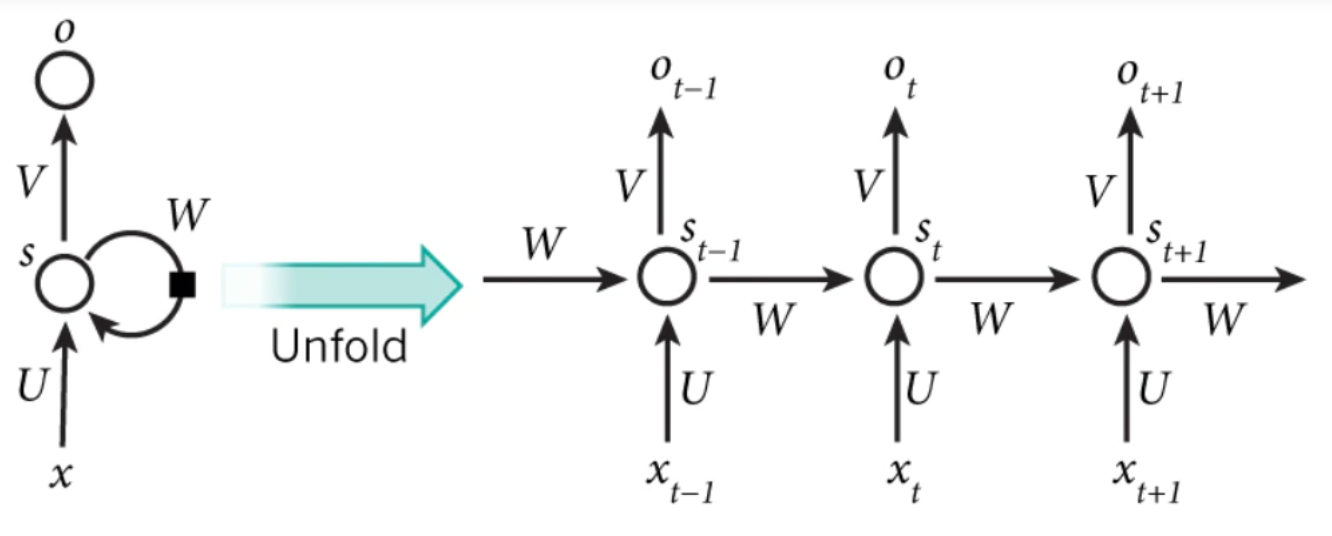

In [ ]:
- 일련의 순서 신경망. 단어 4개 = 4개의 신경망
 - t 시점에서 메모리 셀은 t-1 시점의 메모리 셀이 보낸 은닉상태의 값을 t 시점의 은닉상태
    계산을 위한 입력값이다.
 - x(1)은 one-hot 연산을 구현한다.
 - s(t) 네트워크에서 기억하는 공간
    St = f(Uxt + Wst-1)  이때 함수로 비선형 함수가 된다.
    
 - Ot = t의 출력값 (문장의 출현 예측)
 - Ot = softmax(Vst)
    
- LSTM(Long Short Term Memory) : 장단기 메모리로 은닉층의 메모리셀에 입력게이트, 소멸 게이트, 출력게이트를
추가해서 불필요한 기억은 지우고 기억해야 되는 내용들을 저장한다.
 - 각각의 게이트에는 시그모이드 함수(이진분류)가 존재한다.
 - 시그모이드 함수를 지나면 0, 1 값이 나오게 되는데 이 값들을 가지고 게이트가 조절된다.

In [20]:
import numpy as np
import tensorflow as tf

# RNN은 텐서를 받을때 3D 텐서를 받는다
# 만일 2D의 텐서가 들어온다면 3D로 변경해줘야한다.
inputs = np.random.random([32, 10, 8]).astype(np.float32)
simple_rnn = tf.keras.layers.SimpleRNN(4)
# print(inputs)
# print(type(simple_rnn), simple_rnn)

output = simple_rnn(inputs)  # The output has shape `[32, 4]`.
# print(output)

# return_sequences : 히든레이어를 확인 시켜준다
simple_rnn = tf.keras.layers.SimpleRNN(4, return_sequences=True, return_state=True)
# simple_rnn

# whole_sequence_output has shape `[32, 10, 4]`.
# final_state has shape `[32, 4]`.
whole_sequence_output, final_state = simple_rnn(inputs)
print(whole_sequence_output, '\n')
print(final_state)

tf.Tensor(
[[[ 0.4215089  -0.17108741  0.01070119 -0.91074866]
  [ 0.83381367 -0.34095323 -0.7324357  -0.9719448 ]
  [ 0.52257234 -0.13343531 -0.9672231  -0.9504074 ]
  ...
  [ 0.33161646  0.63909566 -0.6801712  -0.91881603]
  [ 0.20516281  0.554992   -0.12876813 -0.97654533]
  [ 0.47990525  0.34541175 -0.6579353  -0.8390008 ]]

 [[ 0.721872    0.350102    0.25753865 -0.7693061 ]
  [ 0.845949    0.58557546 -0.15285441 -0.95197475]
  [ 0.46598628  0.3053201  -0.27723947 -0.9698163 ]
  ...
  [ 0.2376036  -0.24667649 -0.02953407 -0.87430775]
  [ 0.9556293  -0.29028955 -0.5502233  -0.94581497]
  [ 0.7417787  -0.22644907 -0.9036625  -0.8987979 ]]

 [[ 0.67323077 -0.4705371  -0.7292971  -0.6596642 ]
  [ 0.461775   -0.36443302 -0.93783206 -0.77345794]
  [ 0.3697466  -0.29836234 -0.9011789  -0.89934707]
  ...
  [ 0.3371386  -0.43378177 -0.7036759  -0.9636965 ]
  [ 0.5292123   0.28382733 -0.8076666  -0.94535995]
  [ 0.50024986  0.26107493 -0.59566456 -0.9634641 ]]

 ...

 [[ 0.5405144  -0.51866